# Final Report
## Regression Analysis
### Brandyn Waterman, 3/30/2022, Innis Cohort
Greetings, let us begin with the needed imports for operating this notebook:

In [1]:
# Imports

import acquire, prepare, explore


import warnings
warnings.filterwarnings('ignore')

## Overview:
The purpose of this project is to help provide Zillow with possible insights on predicting the tax values ($) for Single Family Properties. This report will go over the steps that were needed to obtain our **goals** of:
- Identifying key drivers (acquire, prepare, explore)
- Creating Regression models to predict tax values (model)
- Providing recommendations and solutions based on the information learned (summary)

### Planning: 
The first, and critical, step to this process is to plan our interaction with the data and set expectations for our enagement with it.

Some of the initial questions for the data:
1. How will we define "Single Family Properties"? 
2. What will we use to establish a baseline for tax values (mean or median)? 
3. How do our physical attributes impact tax value? (Area, Bedrooms, Bathrooms)
4. How do our add-on features impact tax value? (Pools, Air conditioning, etc...)
5. How do immutable characteristics impact tax value? (Location, Age)

Some of the business centric questions:
1. How can this information assist Zillow and their clients?
2. What variables can be readily utilized moving forward?

Some of the hypotheses to be explored:
1. Is there a linear relationship between tax value and our core physical attributes? (Pearsonr Investigations)
2. Is there a difference in tax values by location (fips)? (ANOVA)
3. Is there a difference in tax values and having add-on components? (T-Tests)

### Acquire:
After our initial mental preparation we want to start to engage with the data itself. The first step in this process will be the act of acquiring it. 

We will be using the functions from our acquire.py module to interact with CodeUp's 'Zillow' SQL database. The get_db_url() function will establish the connection to the SQL server and then acquire_zillow() will return the data in a dataframe to us. The query will grab bedrooms, bathrooms, squarefeet (house_area), lot squarefeet (lot_area), fips (county), yearbuilt, and tax value columns. 

In [2]:
# Calling our function acquire_zillow() from the acquire.py module
zillow = acquire.acquire_zillow()

Using cached csv


### Prepare:
Our preparation of the data began with some slight column name modifications with our acquisition and continues in our prepare.py module. In this module with clean the data, remove outliers, split into three dataframes for integrity purposes, and scale the data.

The initial cleaning includes:

- Dropping our null values
    - df = df.dropna()
- Changing our fips column to a string datatype for appropriate categorical interaction
    - df.fips = df.fips.astype(int)
    - df.fips = df.fips.astype(str)
    - df.fips = '0' + df.fips
        - One-hot encoding our fips column
            - df = pd.get_dummies(df, columns= ['fips'])
- Creation (feature engineering) of an age column to better represent the yearbuilt column
    - df.yearbuilt = df.yearbuilt.astype(int)
    - df['age'] = 2017 - df.yearbuilt
- Removal of outliers
    - Use of remove_outliers() function
- Splitting of the data into train, validate, and test dataframes
    - Use of zillow_split() function

#### Under the Hood: remove_outliers()
This function is performed during our preparation on the zillow dataframe to remove outliers from our
continuous variables, to include the target variable. A standard 1.5 k value was used to figure out the upper and lower bounds from our 1st and 3rd quartiles. The details of the function can be seen in the prepare.py module.

#### Under the Hood: split_zillow()
This function is performed during our preparation on the zillow dataframe to create train, validate, and test splits of the original dataframe that contain 56%, 24%, and 20% splits respectively. This retains the integrity of our models and conclusion by providing both seen and unseen data to interact with when appropriate. The details of this function can be seen in the prepare.py module.  

In [3]:
# Creation of train, validate, and test dataframes from cleaning and splitting our zillow dataframe
train, validate, test = prepare.prepare_zillow(zillow)

### Explore:
After preparing our data we want to explore some of the initial questions that we had about the data. This will involve visual and statistical analysis.

For the purpose of our statistical analysis we will be using an alpha that is set to .05

In [4]:
alpha = .05

**Question 1: How do we define "Single Family Residential"?**
This question was answered during our acquistion of the data through the provided descriptors in the Zillow database. There were designated codes and descriptions that can be seen in our query from acquire.py module.

**Question 2: What will we use to establish a baseline for tax values (mean or median)?**
We will address this question when we get to modeling of the data through an exploration of both mean and median values as a baseline.

**Question 3: How do our physical attributes impact tax value? (Area, Bedrooms, Bathrooms)**
An exploration of our continuous features can be seen in the workbooks, but the general method was a number of visualizations and a statistical Pearsonr test. In the explore.py module the function linear_tests() takes our train dataframe and a list of our continous columns and provides visuals and the outcome of the Pearsonr test. 

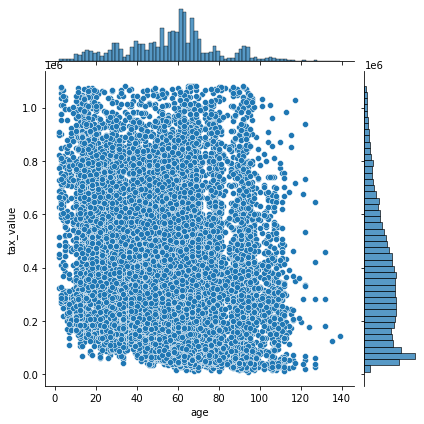

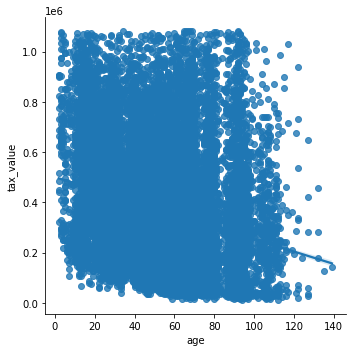

H0: There is no linear relationship between age and tax value.
HA: There is a linear relationship between age and tax value.
----------------------------------------------------------------
p-value: 1.2086289842272746e-272

With a p-value below our established alpha we reject the null hypothesis.


In [5]:
# Example of how the 'age' feature looks with the linear_tests() function using our train dataframe
explore.linear_tests(train, ['age'])

While the 'age' column is addressed in Question 5 it was analyzed with the other continuous variables. The visuals of it are rather busy, but the jointplot (top graph) helps illustrate with the side and top bars a nice visualization of how age has a negative correlation to tax value. As the age increases you can see that the value of the house declines. This was also shown in a heatmap correlatioin that can be seen in the workbooks. 

All of our selected continous features (bedrooms, bathrooms, house_area, lot_size, age) were shown to have a statistically significant linear relationship with tax value. This conclusion addresses our first hypotheses question. 

**Question 4: How do our add-on features impact tax value? (Pools, Air conditioning, etc...)**
Through a combination of preparation and exploration all of our add-on features were removed from our dataset. This was mostly due to these columns having an enermous amount of null values. This decision was made by removing any column that had at least 25% of it consisting of nulls. This work can be seen in the workbooks. This removes the need to explore our third hypotheses question.

**Question 5: How do immutable characteristics impact tax value? (Location, Age)**
The age column was addressed with the other continuous variables, and the location (fips) column was explored using the cat_hists() function from the explore.py module. 

This function provides a histplot visual of each of the locations and conducts an ANOVA statistical test to determine if the mean tax values for the locations are equal. 

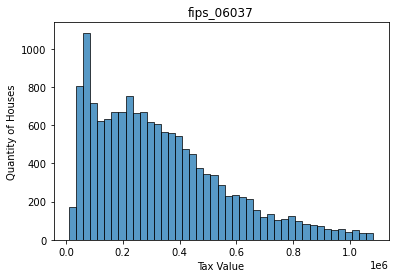

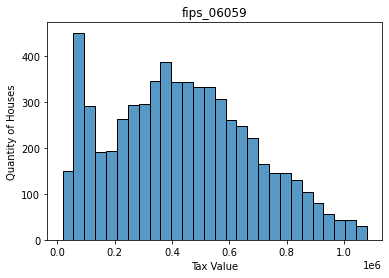

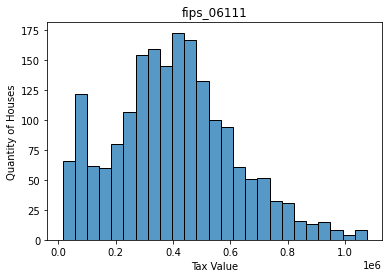

H0: The tax value means of the three fips locations are all equal.
HA: The tax value means of the three fips locations are not equal.
------------------------------------------------------------------
p-value: 2.0616311242234306e-215

With a p-value below our established alpha we reject the null hypothesis.


In [6]:
# Using the cat_hists() function with the train dataframe and our encoded categorical columns
explore.cat_hists(train, ['fips_06037', 'fips_06059', 'fips_06111'])

The above histplots give a good visual of how the tax value is distributed in each location. Something to take note of here is that the quantites themselves have a rather large disparity with fips_06111 having a much smaller representation in the data than fips_06037. Our ANOVA test also concludes that there is a disparity in tax values themselves as well between the regions, and that their mean tax values are not equal. This addresses our third hypotheses question.

#### Scaling:
Now is an appropriate time to scale the data after some needed exploration has been concluded. This needs to be done prior to modeling, and can assist in some last exploratory visuals as well. Our function scale_zillow() in our prepare.py module will scale our train, validate, and test dataframes and return them. 

In [7]:
# Using our scale_zillow() function, using our three split dataframes and returning them with scaled features
train, validate, test = prepare.scale_zillow(train, validate, test)

In [8]:
# An example of what our dataframes look like currently. Scaled continuous features and our categorical feature
# encoded. The target variable is not scaled.
train.head()

,bedrooms,bathrooms,house_area,lot_area,tax_value,age,fips_06037,fips_06059,fips_06111
33000,0.333333,0.333333,0.338297,0.407827,208924.0,0.496350,1,0,0
41488,0.333333,0.333333,0.390094,0.546622,860140.0,0.510949,1,0,0
20794,0.000000,0.333333,0.374879,0.681137,79935.0,0.459854,1,0,0
14842,0.333333,0.166667,0.258336,0.042610,335032.0,0.306569,0,1,0
24140,0.666667,0.666667,0.750405,0.555803,872126.0,0.131387,1,0,0


An quick look at what our dataframes look like.

Our explore.py module also contains heatmap_zillow() function to give a quick glimpse at how all of our selected features interact with one another. The biggest takeaway from our exploration, and later modeling, is that none of our features have a substantial solitary impact on our tax value. 

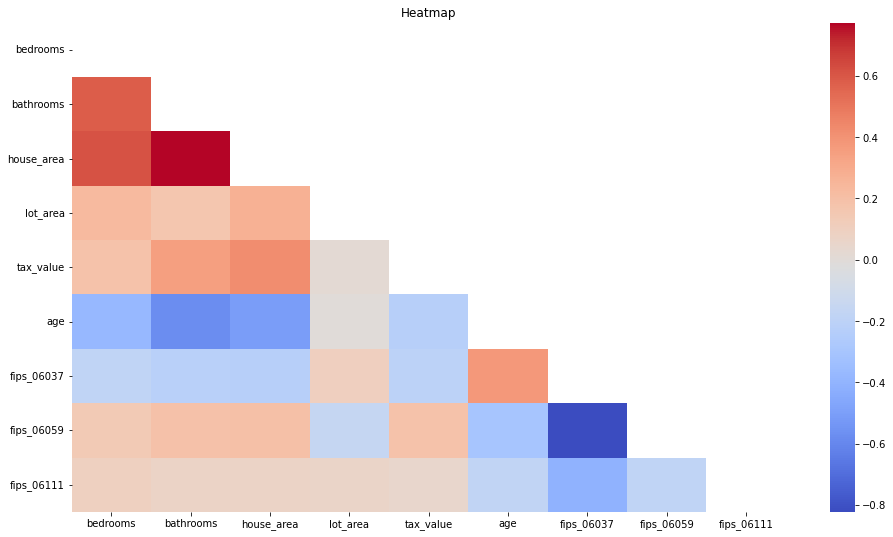

In [10]:
# Using heatmap_zillow() function to illustrate a weak correlation from all of our features generally
explore.heatmap_zillow(train)

#### Explore Summary:
The features we are moving forward with are:

   - Scaled continuous features: bedrooms, bathrooms, house_area, lot_area, age
   - Encoded categorical feature: fips
   - Target feature: tax_value
    
There was a deep exploration on nearly every column that is available from the Zillow database but the biggest takeaway from the venture is that the data consists of far too many nulls, empty values, or redundant information to be substantially useful. Our later modeling and conclusion will address this sentiment in more detail. 